In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/PLUS VAIO/OneDrive/سطح المكتب/work/351-EXCEL.csv')

In [3]:
df.shape

(1000, 8)

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


validity for categorical :

In [7]:
import matplotlib.pyplot as plt


In [8]:
parental_education_por = df['parental level of education'].value_counts(normalize = True)
parental_education_por

parental level of education
some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: proportion, dtype: float64

In [9]:
gender_por = df['gender'].value_counts(normalize = True)
gender_por

gender
female    0.518
male      0.482
Name: proportion, dtype: float64

In [10]:
ethnicity_por = df['race/ethnicity'].value_counts(normalize = True)
ethnicity_por

race/ethnicity
group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: proportion, dtype: float64

In [11]:
lunch_por = df['lunch'].value_counts(normalize = True)
lunch_por

lunch
standard        0.645
free/reduced    0.355
Name: proportion, dtype: float64

no out of range categories

In [12]:
all =[parental_education_por,gender_por,ethnicity_por,lunch_por]

In [13]:
titles = ["parental_education","gender","ethnicity","lunch"]

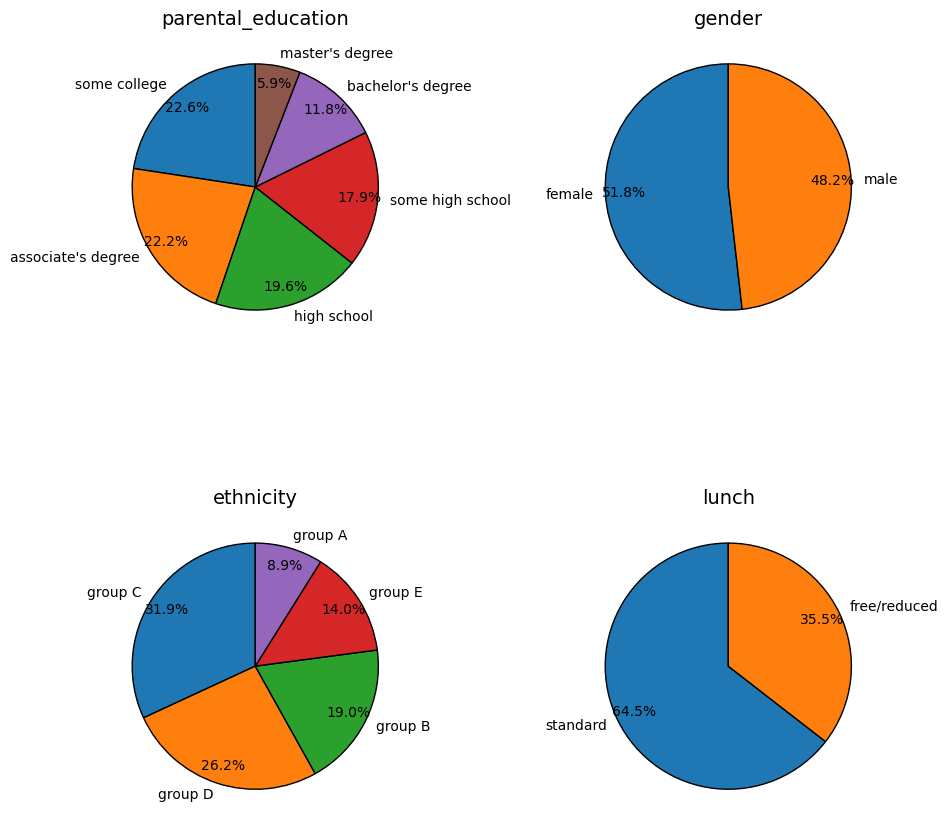

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()
for i, counts in enumerate(all):
    ax = axes[i] 

    counts.plot(
        kind='pie',
        ax=ax,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'black'},
        pctdistance=0.85 # 
    )
  
    ax.set_title(titles[i], fontsize=14)

    
    ax.set_ylabel('')


plt.tight_layout(pad=3.0) 
plt.show()

In [15]:
#completness
null_count = df.isnull().sum()

total_count = len(df)

completeness_rate = (total_count - null_count) / total_count*100

print(completeness_rate)

gender                         100.0
race/ethnicity                 100.0
parental level of education    100.0
lunch                          100.0
test preparation course        100.0
math score                     100.0
reading score                  100.0
writing score                  100.0
dtype: float64


In [17]:
duplicated_count = df.duplicated().sum()

total_count = len(df)

uniqness_rate = (total_count - duplicated_count) / total_count*100

print(uniqness_rate)

100.0


In [76]:
#validity for numeric cols
cols = ["math score", "reading score", "writing score"]
for c in cols:
    valid_range = df[(df[c] <= 100) & (df[c]>= 0)]
    print(f"{c} invalid count:", valid_range.shape[0])

math score invalid count: 1000
reading score invalid count: 1000
writing score invalid count: 1000


In [77]:
import numpy as np

cols = ["math score", "reading score", "writing score"]
for c in cols:
# cala Q1 و Q3
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1

# calc bounds 
    lower_bound_iqr = Q1 - 1.5 * IQR
    upper_bound_iqr = Q3 + 1.5 * IQR

# outliers IQR
    iqr_outliers_count = df[(df[c] < lower_bound_iqr) | (df[c] > upper_bound_iqr)].shape[0]

    print(f"IQR Lower Bound : {lower_bound_iqr}")
    print(f"IQR Upper Bound: {upper_bound_iqr}")
    print(f"outliers (IQR) for {c} are {iqr_outliers_count}")
    
    print(f"outliers (IQR) for {c} are {iqr_outliers_count/1000*100}")
    print(f"Compliance Rate (IQR) for {c} are {100 - iqr_outliers_count/1000*100}")

IQR Lower Bound : 27.0
IQR Upper Bound: 107.0
outliers (IQR) for math score are 8
outliers (IQR) for math score are 0.8
Compliance Rate (IQR) for math score are 99.2
IQR Lower Bound : 29.0
IQR Upper Bound: 109.0
outliers (IQR) for reading score are 6
outliers (IQR) for reading score are 0.6
Compliance Rate (IQR) for reading score are 99.4
IQR Lower Bound : 25.875
IQR Upper Bound: 110.875
outliers (IQR) for writing score are 5
outliers (IQR) for writing score are 0.5
Compliance Rate (IQR) for writing score are 99.5


In [59]:
for c in cols:
    print(f"\n{c} outliers (IQR):")
    display(iqr_outlier_rows(df, c))


math score outliers (IQR):


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23



reading score outliers (IQR):


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23



writing score outliers (IQR):


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23
